<a href="https://colab.research.google.com/github/akash-baranwal/Image-classification/blob/master/gala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai import *
import fastai

In [0]:
from fastai.vision import *

In [0]:
import torch
torch.cuda.is_available()


True

In [0]:
torch.backends.cudnn.enabled

True

In [0]:
import os
os.listdir()
# os.getcwd()

In [0]:
!nvidia-smi

Tue Mar 24 07:27:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!unzip dataset.zip

In [0]:
path='dataset/'

fnames = np.array([f'train/{f}' for f in sorted(os.listdir(f'{path}train'))])


In [0]:
fnames


array(['train/image10.jpg', 'train/image10000.jpg', 'train/image10002.jpg', 'train/image10003.jpg', ...,
       'train/image9992.jpg', 'train/image9993.jpg', 'train/image9994.jpg', 'train/image9997.jpg'], dtype='<U20')

In [0]:
data=pd.read_csv(f'{path}labels.csv')

In [0]:
data.head()

,name,label
0,train/image7042.jpg,Food
1,train/image3327.jpg,misc
2,train/image10335.jpg,Attire
3,train/image8019.jpg,Food
4,train/image2128.jpg,Attire


In [0]:
tfms=tfms = get_transforms(max_lighting=0.15, max_zoom=1.1, max_warp=0.15)
data = ImageDataBunch.from_csv(path, ds_tfms=tfms,bs=32, size=(256)).normalize(imagenet_stats)

In [0]:
print(data.c,data.classes,data.batch_size)

4 ['Attire', 'Decorationandsignage', 'Food', 'misc'] 32


In [0]:
 test = ImageList.from_csv(path,'test.csv')
data.add_test(test)

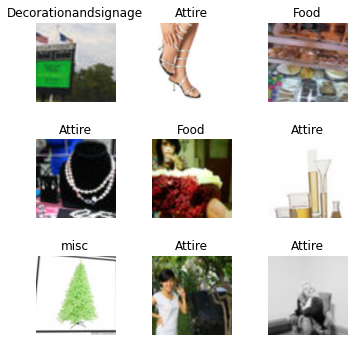

In [0]:
data.show_batch(rows=3,figsize=(5,5))

In [0]:
data

ImageDataBunch;

Train: LabelList (4787 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Food,misc,Food,Attire,Food
Path: dataset;

Valid: LabelList (1196 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Decorationandsignage,Decorationandsignage,Food,misc,Attire
Path: dataset;

Test: LabelList (3219 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: dataset

In [0]:
learn=cnn_learner(data,models.resnet152,metrics=[accuracy]).mixup()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


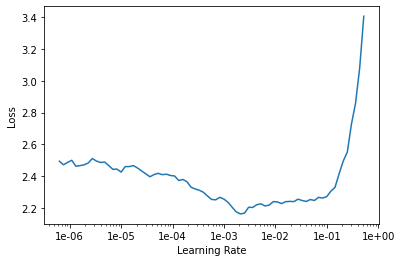

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,slice(3e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.647996,0.940109,0.708194,01:52
1,1.197135,0.683580,0.752508,01:54
2,1.008746,0.578456,0.797659,01:54
3,0.915759,0.537343,0.814381,01:54


In [0]:
learn.save('stage1')

In [0]:
learn.load('stage1')
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.003896,0.779681,0.702521,0.297479,00:06
1,1.048309,0.804953,0.677311,0.322689,00:06
2,1.058310,0.816803,0.695798,0.304202,00:06
3,1.041540,0.793407,0.704202,0.295798,00:06
4,0.998018,0.782449,0.702521,0.297479,00:06


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (4787 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Food,misc,Attire,Attire,misc
Path: dataset;

Valid: LabelList (1196 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Attire,Food,Food,Food,Attire
Path: dataset;

Test: LabelList (3219 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: dataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

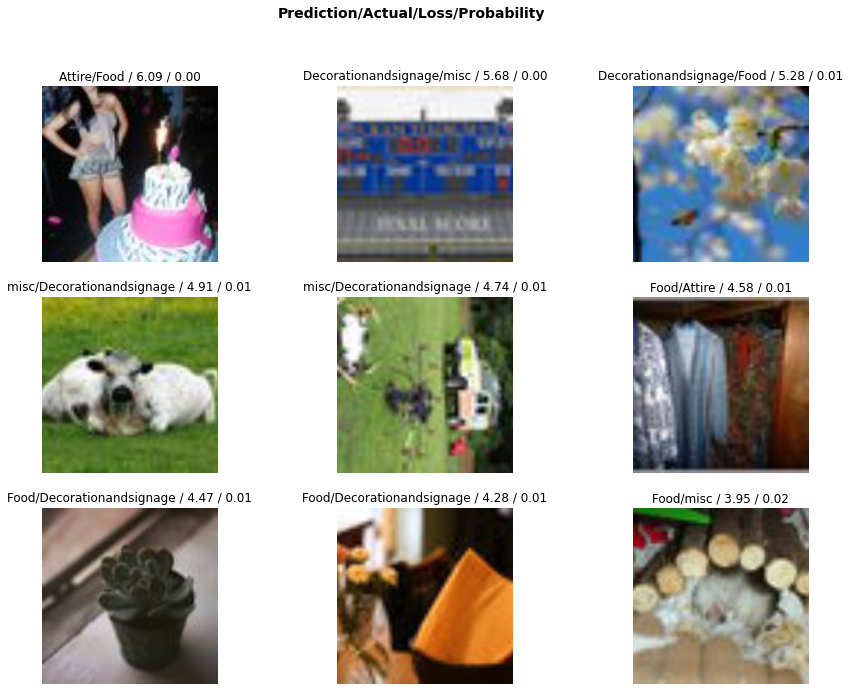

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

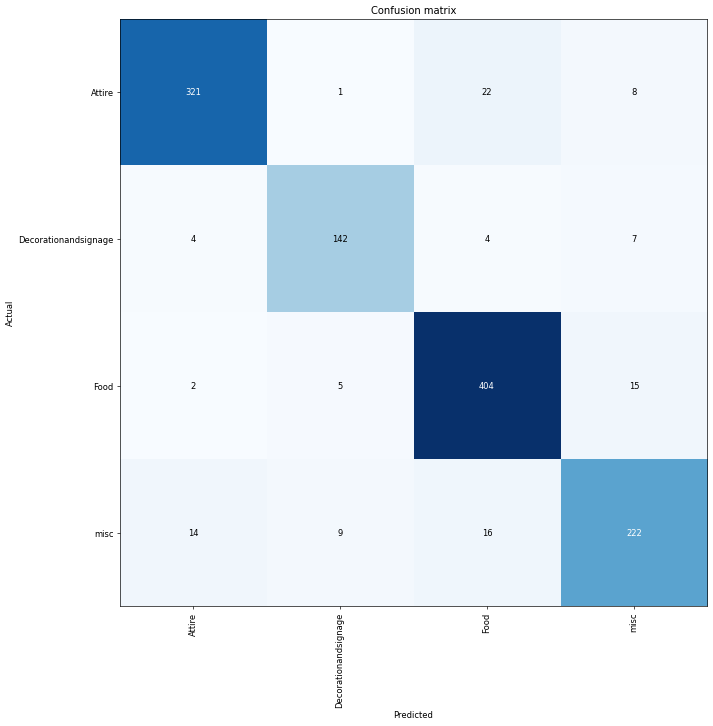

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused()

[('misc', 'Food', 35),
 ('Attire', 'misc', 29),
 ('Attire', 'Food', 28),
 ('misc', 'Attire', 28),
 ('Food', 'Attire', 23),
 ('Food', 'misc', 21),
 ('Decorationandsignage', 'misc', 15),
 ('Food', 'Decorationandsignage', 13),
 ('Decorationandsignage', 'Food', 12),
 ('misc', 'Decorationandsignage', 9),
 ('Decorationandsignage', 'Attire', 7),
 ('Attire', 'Decorationandsignage', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


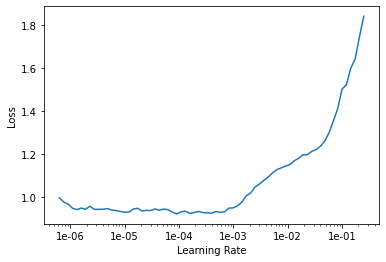

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.957385,0.552649,0.800167,02:36
1,0.878565,0.478934,0.823579,02:36
2,0.769499,0.440235,0.847826,02:36
3,0.705894,0.439553,0.846990,02:36


In [0]:
learn.save('resnetstage-2')

In [0]:
learn.load('resnetstage-2')


Learner(data=ImageDataBunch;

Train: LabelList (4787 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Food,misc,Food,Attire,Food
Path: dataset;

Valid: LabelList (1196 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Decorationandsignage,Decorationandsignage,Food,misc,Attire
Path: dataset;

Test: LabelList (3219 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: dataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('misc', 'Food', 23),
 ('Food', 'misc', 16),
 ('Attire', 'Food', 14),
 ('Attire', 'misc', 11),
 ('misc', 'Attire', 10),
 ('Decorationandsignage', 'Food', 7),
 ('Food', 'Attire', 5),
 ('Food', 'Decorationandsignage', 5),
 ('misc', 'Decorationandsignage', 4),
 ('Decorationandsignage', 'Attire', 3),
 ('Decorationandsignage', 'misc', 3),
 ('Attire', 'Decorationandsignage', 1)]

In [0]:
learn.export()

In [0]:
tester=load_learner(path,test=test)

In [0]:
data.test_ds

LabelList (3219 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: dataset

In [0]:
preds,y = tester.get_preds(ds_type=DatasetType.Test)
preds[:5]


tensor([[2.0602e-01, 1.4530e-02, 7.6189e-01, 1.7553e-02],
        [2.0183e-01, 1.9834e-02, 2.3972e-01, 5.3861e-01],
        [3.0473e-03, 5.1321e-03, 9.2148e-01, 7.0340e-02],
        [7.6433e-04, 7.8045e-03, 9.8570e-01, 5.7361e-03],
        [9.7792e-01, 9.3073e-04, 1.0031e-02, 1.1117e-02]])

In [0]:
labels = torch.argmax(preds, dim=1)


In [0]:
results = [data.classes[int(x)] for x in labels]

In [0]:
results[:10]

['Food',
 'misc',
 'Food',
 'Food',
 'Attire',
 'Attire',
 'Attire',
 'misc',
 'misc',
 'Attire']

In [0]:
learn.data.c2i

{'Attire': 0, 'Decorationandsignage': 1, 'Food': 2, 'misc': 3}

In [0]:
df=pd.read_csv(f'{path}test.csv')

In [0]:
df.head()

,name
0,test/image6245.jpg
1,test/image10409.jpg
2,test/image8692.jpg
3,test/image10517.jpg
4,test/image2580.jpg


In [0]:
def rem_testpath(x):
    return x[5:]
df['Image']=df['name'].apply(rem_testpath)
df.drop('name',axis=1,inplace=True)
df['Class']=results

In [0]:
df.head()

,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,misc
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire


In [0]:
df.to_csv('resnet152v4.csv',index=False)